In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./test.xlsx")
df.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests
0,2019-01-01,control,30,7486.620,1.069746,24,1
1,2019-01-02,control,152,38301.575,1.044199,121,8
2,2019-01-03,control,267,67768.425,1.032276,215,14
3,2019-01-04,control,369,94992.900,1.028196,298,19
4,2019-01-05,control,478,123236.875,1.011807,390,24


In [3]:
# 先计算ROI（回报率）
df['ROI'] = df['gmv']/(df['coupon per trip']*df['trips'])
df.head()

,date,group,requests,gmv,coupon per trip,trips,canceled requests,ROI
0,2019-01-01,control,30,7486.620,1.069746,24,1,291.604269
1,2019-01-02,control,152,38301.575,1.044199,121,8,303.143166
2,2019-01-03,control,267,67768.425,1.032276,215,14,305.346684
3,2019-01-04,control,369,94992.900,1.028196,298,19,310.026761
4,2019-01-05,control,478,123236.875,1.011807,390,24,312.304607


In [4]:
df.group.value_counts()

group
control       29
experiment    29
Name: count, dtype: int64

In [5]:
# 对ROI,gmv,requests三个指标进行 方差检验->t检验 （查看实验组和对照组是否有影响到这些我们看重的指标）
# 方差分析看他方差是不是有区别，因为后续t检验默认了他们之间的方差波动是一致的
# 记requests均值分别为u1，u2
# 零假设H0:u1=u2,备选假设：u1!=u2
# 显著性水平取0.05
request_A = df[df['group'] == 'control'].requests
request_B = df[df['group'] == 'experiment'].requests
import scipy.stats as st
st.levene(request_A,request_B) # p = 0.903 > 0.05 不拒绝原假设，他们齐方差

LeveneResult(statistic=np.float64(0.014685075667736849), pvalue=np.float64(0.903980667108546))

In [1]:
# 该数据为同一样本实验前后的不同水平，因此选用配对样本t检验(ttest_rel)。
# requests 均值检验
# 记两组均值为u1,u2
# 零假设H0:u1=u2,备选假设H1:u1!=u2
# 显著性水平取0.05
st.ttest_rel(request_A,request_B)# p=0.98>0.05 不拒绝原假设，他们之间的均值没有显著差异

NameError: name 'st' is not defined

In [7]:
# gmv,ROI同理
gmv_A = df[df['group'] == 'control'].gmv
gmv_B = df[df['group'] == 'experiment'].gmv
# 方差检验
st.levene(gmv_A,gmv_B)# p=0.866>0.05 不拒绝原假设，他们齐方差
# t检验，查看均值
st.ttest_rel(gmv_A,gmv_B)# 这里是配对t检验。不用方差检验的。。p<0.05这里可以拒绝原假设(u1=u2),说明能证明出不同组的gmv有显著差异

TtestResult(statistic=np.float64(4.247583846321442), pvalue=np.float64(0.00021564303983362577), df=np.int64(28))

In [8]:
ROI_A = df[df['group'] == 'control'].ROI
ROI_B = df[df['group'] == 'experiment'].ROI
st.ttest_rel(ROI_A,ROI_B)# p<0.05 拒绝原假设，说明实验条件对ROI有显著影响

TtestResult(statistic=np.float64(10.305504459268173), pvalue=np.float64(4.93261342734923e-11), df=np.int64(28))

## 城市运营分析

In [9]:
city = pd.read_excel("./city.xlsx")
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814


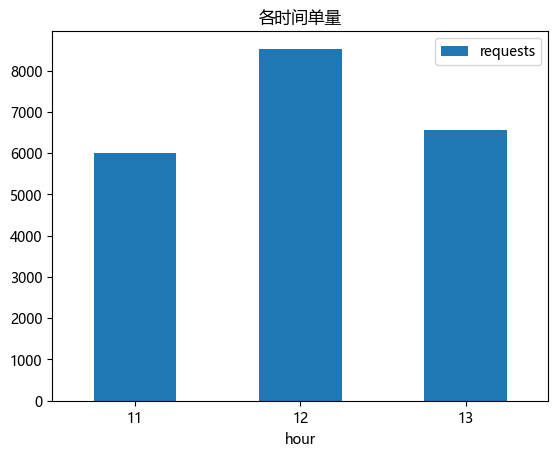

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 单量最多的时间点
req_hour = city.groupby('hour')['requests'].sum()
req_hour.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('各时间单量')
plt.legend()
# plt.bar(req_hour.hour,req_hour.requests)
plt.show()

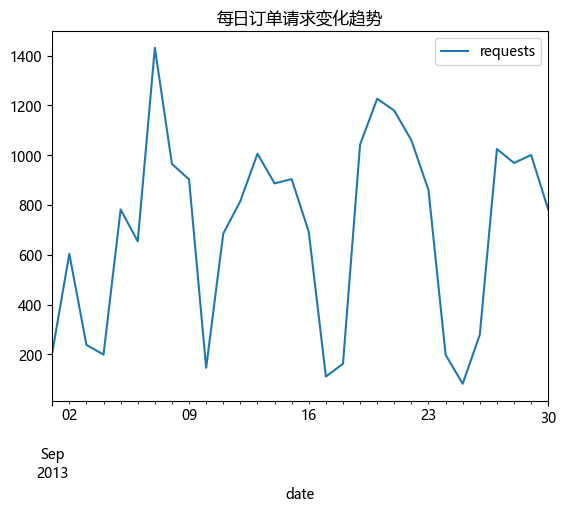

In [11]:
# 单量最多的日期
req_date = city.groupby(['date'],as_index=True).agg({'requests':'sum'},inplace=True)
req_date.plot(kind='line')
plt.title('每日订单请求变化趋势')
plt.show()

In [13]:
# 各时段订单完成率
com_hour = city.groupby('hour',as_index=False).agg({'requests':'sum','trips':'sum'})
com_hour['rate'] = com_hour['trips']/com_hour['requests']
com_hour

,hour,requests,trips,rate
0,11,6008,4550,0.757324
1,12,8530,5850,0.685815
2,13,6559,3085,0.470346


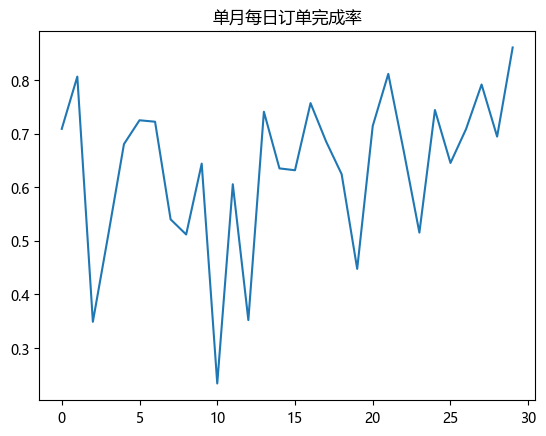

In [ ]:
# 单月每日订单完成率
com_date = city.groupby('date',as_index=False).agg({'requests':'sum','trips':'sum'})
com_date['rate'] = com_date['trips']/com_date['requests']
com_date.rate.plot(kind='line')
plt.title('每日订单完成率趋势')
plt.show()

D:\temp\Temp\ipykernel_7628\2438580605.py:3: FutureWarning: The provided callable <function mean at 0x000001882EEB4EA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  eta_hour = city.groupby('hour',as_index=True).agg({'pETA':np.mean,'aETA':np.mean})


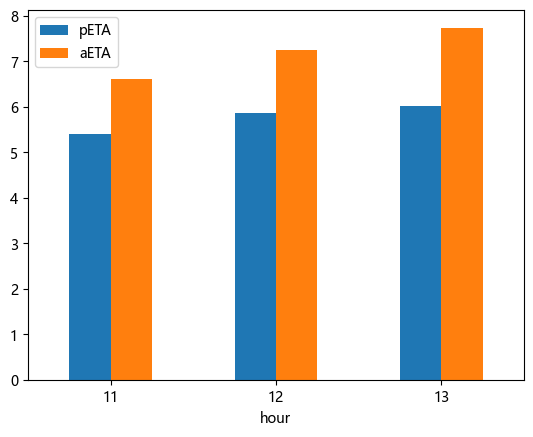

In [ ]:
# 顾客等待时间
import numpy as np
eta_hour = city.groupby('hour',as_index=True).agg({'pETA':np.mean,'aETA':np.mean})
eta_hour.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('顾客等待时间')
plt.show()

In [ ]:
# 司机在忙率
city['busy']=city['supply hours']*city['utiliz']
busy_hour = city.groupby('hour',as_index=False).agg({'supply hours':'sum','busy':'sum'})
busy_hour['utiliz'] = busy_hour['busy']/busy_hour['supply hours']
busy_hour # 12点司机在忙总时长最长，在忙率也最高，用户订单请求也最多，说明车辆总数偏少。

,hour,supply hours,busy,utiliz
0,11,1660.01,768.51,0.462955
1,12,1818.03,1115.28,0.613455
2,13,1274.60,730.83,0.573380


In [26]:
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz,busy
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240,20.43
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297,15.53
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503,17.76
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187,31.47
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814,38.68


D:\temp\Temp\ipykernel_7628\1671082105.py:2: FutureWarning: The provided callable <function mean at 0x000001882EEB4EA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  supply_hour = city.groupby('hour',as_index=True).agg({'supply hours':np.mean})


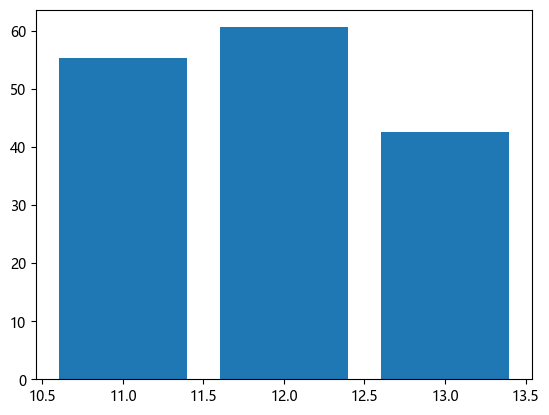

In [ ]:
# 订单时间
supply_hour = city.groupby('hour',as_index=True).agg({'supply hours':np.mean})
plt.bar(supply_hour.index,supply_hour['supply hours'])  
plt.show()